In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
row_per_class = 100
neurone_nb = 2

In [4]:
def get_dataset():
    # number of rows
    # generate rows
    sick = np.random.randn(row_per_class, 2) + np.array([-2, -2])
    healthy = np.random.randn(row_per_class, 2) + np.array([2, 2])
    
    features = np.vstack([sick, healthy])
    targets = np.concatenate((np.zeros(row_per_class), np.ones(row_per_class)))
    
    return features, targets

In [5]:
def init_variables():
    # weight and bias
    weights = np.random.normal(size=neurone_nb)
    bias = 0
    return weights, bias

In [6]:
def pre_activation(features, weights, bias):
    
    return np.dot(features, weights) + bias

In [9]:
def activation(z):
    return 1/(1+np.exp(-z))    

In [46]:
def predict(features, weights, bias):
    z = pre_activation(features, weights, bias)
    a = activation(z)
    return np.round(a)

In [50]:
def cost(predictions, targets):
    return np.mean((predictions - targets)**2)

In [51]:
def derivative_activation(z):
    return activation(z) * (1 - activation(z))

In [58]:
def train(features, targets, weights, bias):
    epochs = 100
    learning_rate = 0.1
    
    # print accuracy
    predictions = predict(features, weights, bias)
    print("Accuray : ", (np.mean(predictions == targets)))
    
    # plot points
    plt.scatter(features[:, 0], features[:, 1], s=40, c=targets, cmap=plt.cm.Spectral)
    plt.show()
    
    for ep in range(epochs):
        if ep % 10 == 0:
            predictions = activation(pre_activation(features, weights, bias))
            print("Cost : ", cost(predictions, targets))
        # init gradient
        weights_gradients = np.zeros(weights.shape)
        bias_gradients = 0
        
        for feature, target in zip(features, targets):
            z = predict(feature, weights, bias)
            a = activation(z)
            weights_gradients += (a - target) * derivative_activation(z) * feature
            bias_gradients += (a - target) * derivative_activation(z)
            
        weights = weights - learning_rate * weights_gradients
        bias = bias - learning_rate * bias_gradients
    
    # print accuracy
    predictions = predict(features, weights, bias)
    print("Accuray : ", (np.mean(predictions == targets)))
        

Accuray :  0.015


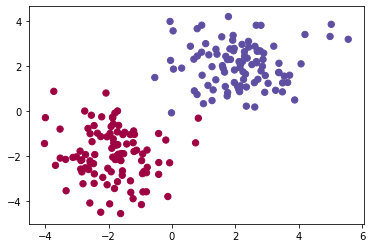

Cost :  0.8026752483092846
Cost :  0.009999474229697847
Cost :  0.00999999998527515
Cost :  0.009999999999999586
Cost :  0.01
Cost :  0.01
Cost :  0.01
Cost :  0.01
Cost :  0.01
Cost :  0.01
Accuray :  0.99


/tmp/ipykernel_10867/1226184271.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


In [59]:
features, targets = get_dataset()
weights, bias = init_variables()
train(features, targets, weights, bias)